<a href="https://colab.research.google.com/github/Sumit15012001/-Forecasting-Business-Trends-with-Basic-Time-Series-Analysis/blob/main/Sumit_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = "/content/forecasting_business_trends.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    1500 non-null   object 
 1   Sales Volume            1500 non-null   int64  
 2   Revenue ($)             1500 non-null   float64
 3   Expenses ($)            1500 non-null   float64
 4   Profit ($)              1500 non-null   float64
 5   Customer Count          1500 non-null   int64  
 6   Marketing Spend ($)     1500 non-null   float64
 7   Website Traffic         1500 non-null   int64  
 8   Product Demand Index    1500 non-null   float64
 9   Inventory Level         1500 non-null   int64  
 10  Return Rate (%)         1500 non-null   float64
 11  Competitor Price Index  1500 non-null   float64
 12  Economic Indicator      1500 non-null   float64
 13  Seasonal Index          1500 non-null   float64
 14  Trend Score             1500 non-null   

(None,
          Date  Sales Volume  Revenue ($)  Expenses ($)  Profit ($)  \
 0  2020-01-01           152      2889.15       4481.73     3102.70   
 1  2020-01-02           485      9082.49       6179.04     4698.56   
 2  2020-01-03           398      2846.26       5205.82     3342.71   
 3  2020-01-04           320      2716.19       1283.63      476.33   
 4  2020-01-05           156      1328.95       6365.95     1837.86   
 
    Customer Count  Marketing Spend ($)  Website Traffic  Product Demand Index  \
 0             136              1529.40             4251                 38.65   
 1             100               624.54             4052                 21.13   
 2              58              2230.81              967                 63.27   
 3              55               831.22             1994                 97.60   
 4             187              1523.35             1519                 31.06   
 
    Inventory Level  Return Rate (%)  Competitor Price Index  \
 0     

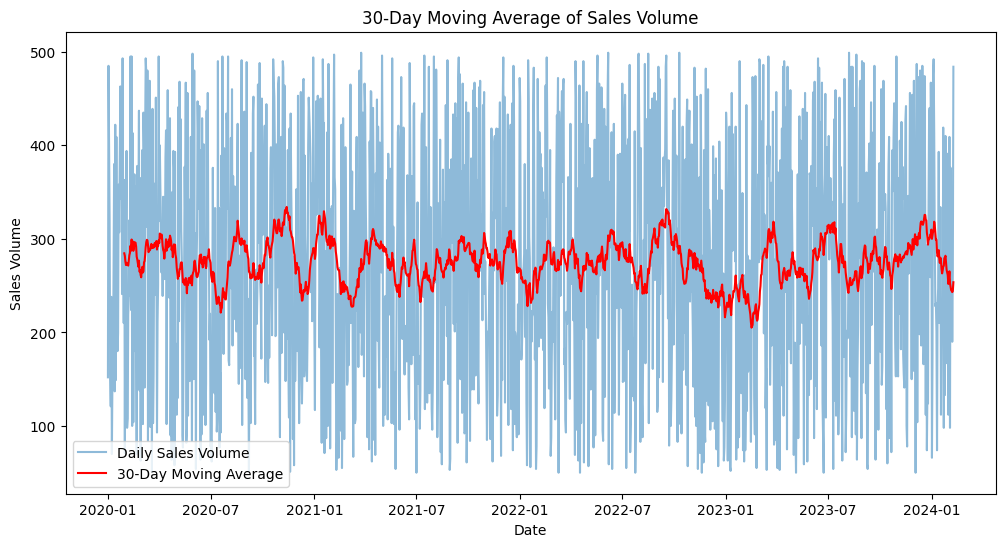

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index for time series analysis
df.set_index('Date', inplace=True)

# Plot moving average for sales volume
df['Sales Volume (30-day MA)'] = df['Sales Volume'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales Volume'], label='Daily Sales Volume', alpha=0.5)
plt.plot(df.index, df['Sales Volume (30-day MA)'], label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('30-Day Moving Average of Sales Volume')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


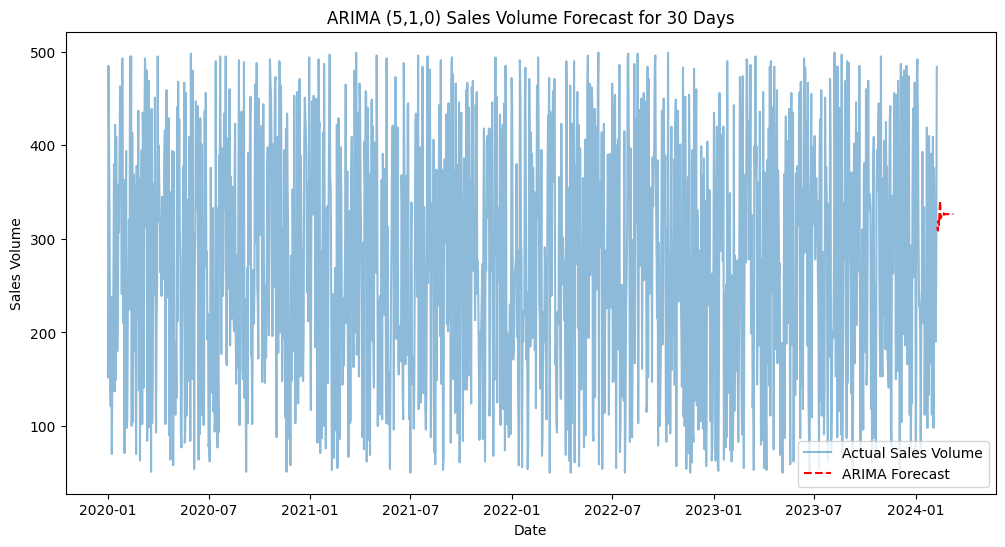

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (5,1,0) on Sales Volume
arima_model = ARIMA(df['Sales Volume'], order=(5,1,0))
arima_result = arima_model.fit()

# Forecast for the next 30 days
forecast_period = 30
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_period+1, freq='D')[1:]
forecast_values = arima_result.forecast(steps=forecast_period)

# Plot actual vs. forecasted sales volume
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales Volume'], label='Actual Sales Volume', alpha=0.5)
plt.plot(forecast_index, forecast_values, label='ARIMA Forecast', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('ARIMA (5,1,0) Sales Volume Forecast for 30 Days')
plt.legend()
plt.show()


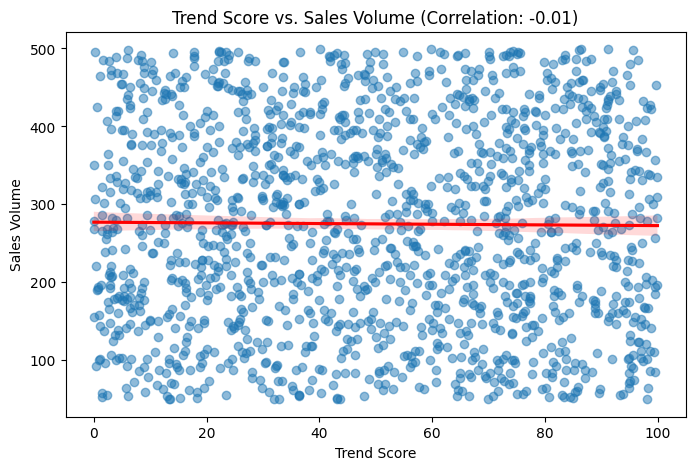

In [ ]:
import scipy.stats as stats

# Compute correlation between Trend Score and Sales Volume
corr_trend_sales, p_value = stats.pearsonr(df['Trend Score'], df['Sales Volume'])

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Trend Score'], y=df['Sales Volume'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Trend Score')
plt.ylabel('Sales Volume')
plt.title(f'Trend Score vs. Sales Volume (Correlation: {corr_trend_sales:.2f})')
plt.show()


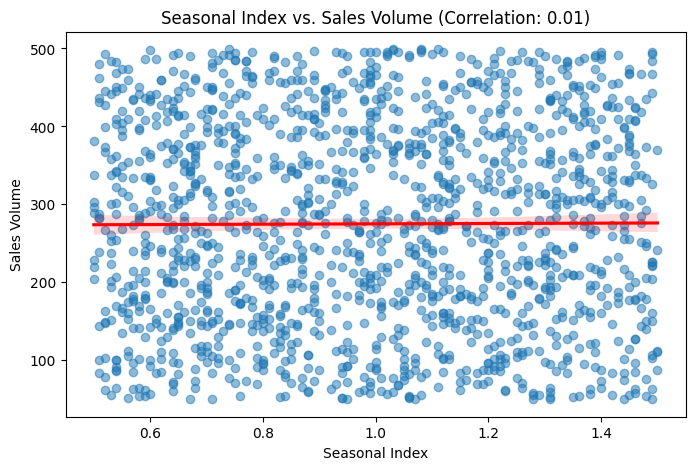

In [ ]:
# Compute correlation between Seasonal Index and Sales Volume
corr_seasonal_sales, _ = stats.pearsonr(df['Seasonal Index'], df['Sales Volume'])

# Plot Seasonal Index vs. Sales Volume
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Seasonal Index'], y=df['Sales Volume'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Seasonal Index')
plt.ylabel('Sales Volume')
plt.title(f'Seasonal Index vs. Sales Volume (Correlation: {corr_seasonal_sales:.2f})')
plt.show()


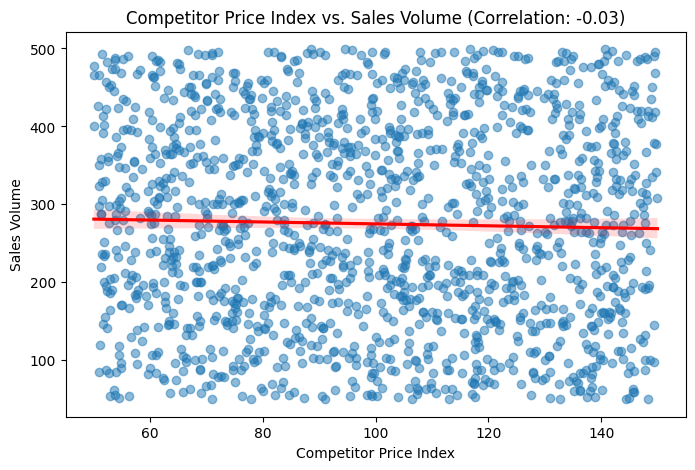

In [ ]:
# Compute correlation between Competitor Price Index and Sales Volume
corr_competitor_sales, _ = stats.pearsonr(df['Competitor Price Index'], df['Sales Volume'])

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Competitor Price Index'], y=df['Sales Volume'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Competitor Price Index')
plt.ylabel('Sales Volume')
plt.title(f'Competitor Price Index vs. Sales Volume (Correlation: {corr_competitor_sales:.2f})')
plt.show()


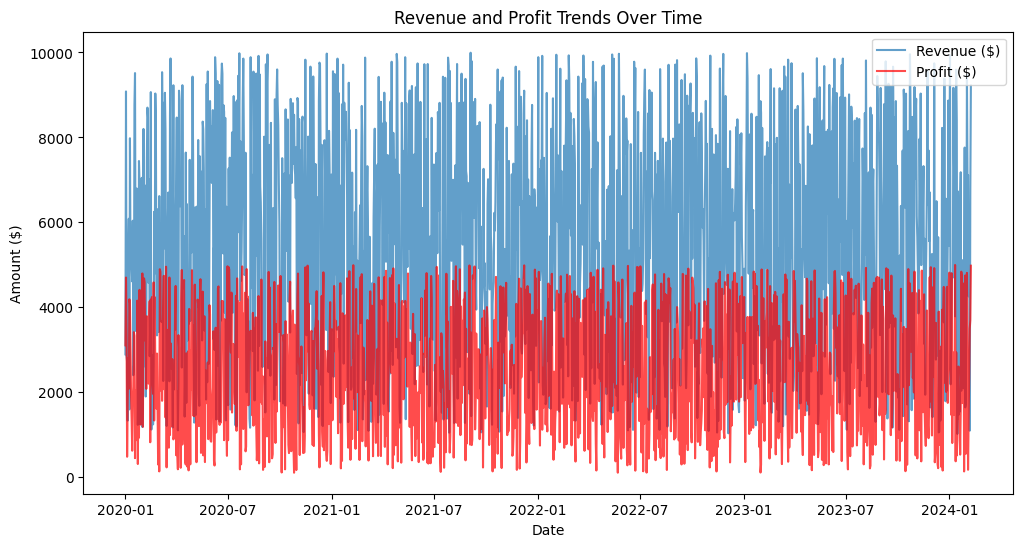

In [ ]:
# Plot Revenue and Profit trends over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue ($)'], label='Revenue ($)', alpha=0.7)
plt.plot(df.index, df['Profit ($)'], label='Profit ($)', alpha=0.7, color='red')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.title('Revenue and Profit Trends Over Time')
plt.legend()
plt.show()


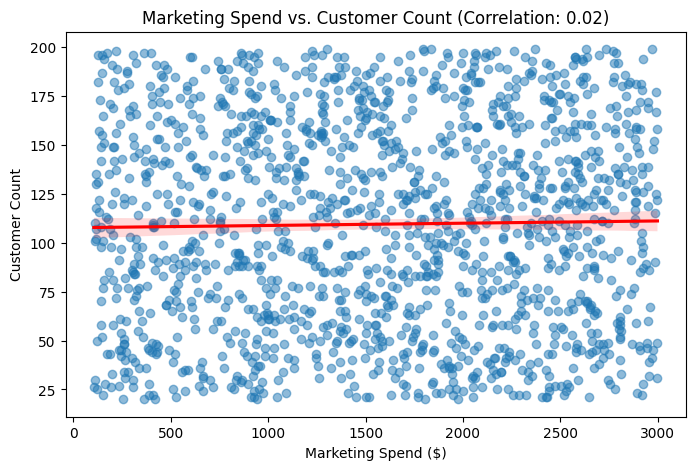

In [ ]:
# Compute correlation between Marketing Spend and Customer Count
corr_marketing_customers, _ = stats.pearsonr(df['Marketing Spend ($)'], df['Customer Count'])

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Marketing Spend ($)'], y=df['Customer Count'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Marketing Spend ($)')
plt.ylabel('Customer Count')
plt.title(f'Marketing Spend vs. Customer Count (Correlation: {corr_marketing_customers:.2f})')
plt.show()


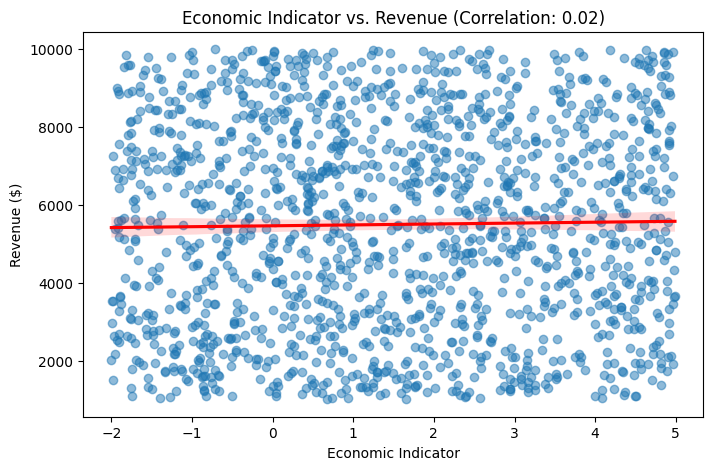

In [ ]:
# Compute correlation between Economic Indicator and Revenue
corr_economic_revenue, _ = stats.pearsonr(df['Economic Indicator'], df['Revenue ($)'])

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Economic Indicator'], y=df['Revenue ($)'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Economic Indicator')
plt.ylabel('Revenue ($)')
plt.title(f'Economic Indicator vs. Revenue (Correlation: {corr_economic_revenue:.2f})')
plt.show()


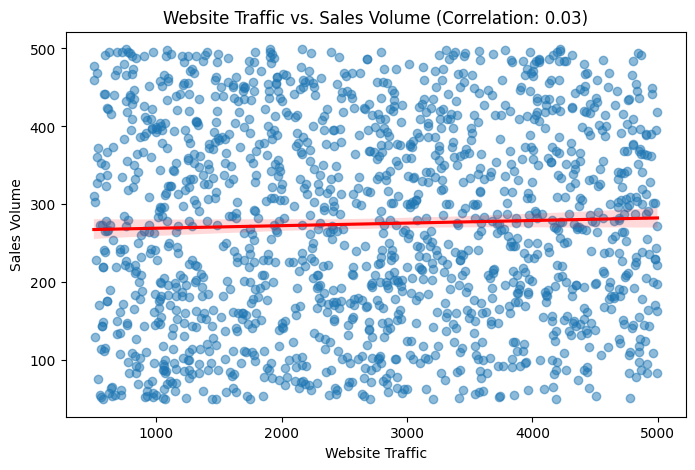

In [ ]:
# Compute correlation between Website Traffic and Sales Volume
corr_traffic_sales, _ = stats.pearsonr(df['Website Traffic'], df['Sales Volume'])

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Website Traffic'], y=df['Sales Volume'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Website Traffic')
plt.ylabel('Sales Volume')
plt.title(f'Website Traffic vs. Sales Volume (Correlation: {corr_traffic_sales:.2f})')
plt.show()
